# <center>Práctica N°2: <br>Generación cuántica de números aleatorios</center>

### <br><center>Luisa Fernanda Gómez Buitrago<br>Luis Javier Zuluaga Betancur </center>

#### <br><center>Computación Cuántica 2022.1<br>Facultad de Ingeniería<br>Universidad de Antioquia</center>

## 1. Instalación del Qiskit<br>
  1.1. A fin de realizar esta práctica de laboratorio, instale localmente en su computador de trabajo, la última versión de la plataforma **Qiskit**. Para ello siga las instrucciones indicadas en la siguiente página:  <br>
<center> <a href="https://github.com/Qiskit/Qiskit">https://github.com/Qiskit/Qiskit</a></center> <br>
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [19]:
import warnings
import qiskit
qiskit.__version__

'0.21.0'

In [ ]:
# pip install ibm-quantum-widgetsb

  1.2. Verifique que su instalación del **Qiskit** fue correcta, ejecutando alguno de los ejercicios llevados
a cabo en la **Práctica No. 1** de nuestro curso:  <br>

In [1]:
# Importar librerias necesarias
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

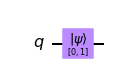

In [3]:
# Definir circuito cuántico e inicialización de estado
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state,0)

# Visualización del circuito
qc.draw(output='mpl', style={'backgroundcolor': '#FFFFFF'})


Con el diagrama anterior se comprueba la correcta instalación de la librería.

In [4]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor


## 2. Generación cuántica de números aleatorios<br>
  2.1. Luego de verificar su correcta instalación local de la plataforma **Qiskit**, descargue el programa
encontrado en el siguiente enlace, y abra en su entorno de trabajo el código fuente descargado:  <br>
  <center>
    <b>Teams de Computación Cuántica 2022.1:</b> <br>
    <a href="https://surl.ms/Bjd">QRNG_Quantum Random</a></center> <br>


2.2. Estudie este código y explique cómo este programa realiza la **generación de números aleatorios**.<br>

In [6]:
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
token = 'ed185a8fb8ddaf48d5c19dc1014af69181847a37c6bc517fb70c3abf77e330ab2a003cd09fcd8bb608f30ee64cfe0e9e7502be1505f404cff9afe13f3ac73efd'
IBMQ.save_account(token, overwrite=True)
my_provider = IBMQ.load_account()


In [7]:
print(my_provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]


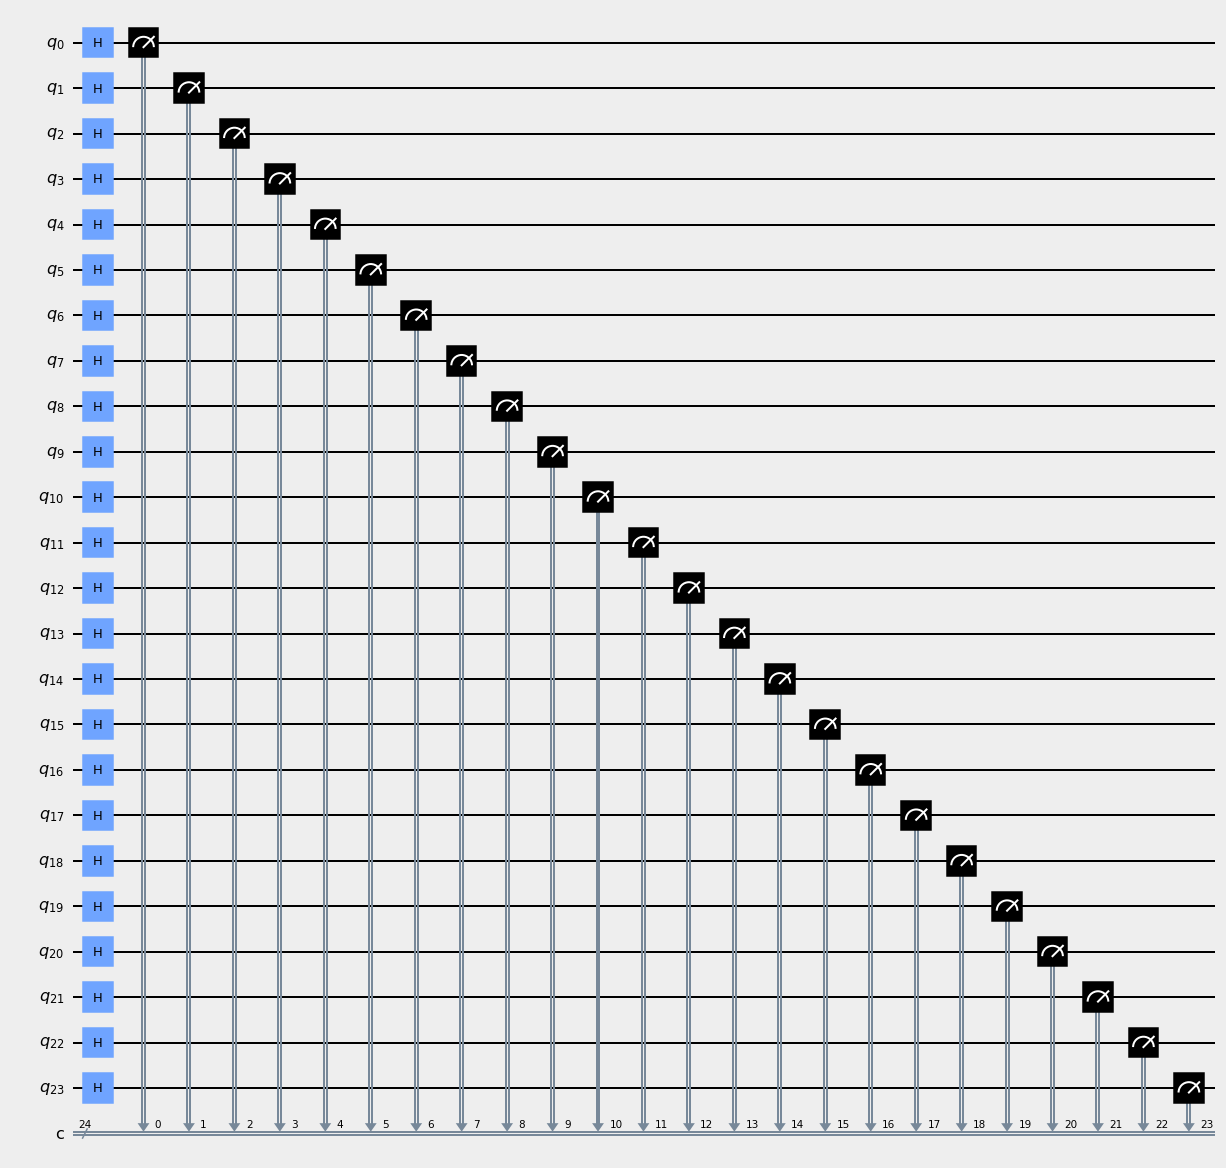

In [8]:
minimo = 0
maximo = 100

num_q = 24

q = QuantumRegister(num_q, 'q')
c = ClassicalRegister(num_q, 'c')

# pip install pylatexenc

circuit = QuantumCircuit(q, c)
circuit.h(q)  # Applies hadamard gate to all qubits
circuit.measure(q, c)  # Measures all qubits

circuit.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})


&nbsp;&nbsp;&nbsp;a. ¿Qué hacen las compuertas Hadamard en este circuito, y cuál es su papel en la generación
del **número aleatorio resultante**?

> Las compuertas hadamard son las encargadas de la aleatoriedad puesto que las probabilidades de obtener un qubit en cero $(\ket{q} = \ket{0})$ o un qubit en 1 $(\ket{q} = \ket{1})$ son equiprobables.

In [9]:
backend = my_provider.get_backend("ibmq_qasm_simulator")

In [10]:
job = execute(circuit, backend, shots=1)

print('Executing Job...\n')
job_monitor(job)

Executing Job...

Job Status: job has successfully run


&nbsp;&nbsp;&nbsp;b. ¿Por qué en la ejecución del circuito sólo se realiza un disparo (shot)?
> Como nuestro circuito es un generador de números aleatorios, con el primer disparo ya se obtiene el resultado deseado. Es decir, cualquier resultado nos sirve

&nbsp;&nbsp;&nbsp;c. ¿Tendría utilidad realizar más de un disparo en la ejecución de este circuito?.
> No tendría utilidad puesto que con cada disparo se generan diferentes números aleatorios y ya con el primero se lograron.

In [11]:
counts = job.result().get_counts()
print('Counts: ', counts, '\n')

result = int(counts.most_frequent(), 2)
print('Result: ', result, '\n')

Counts:  {'010100111011100000110011': 1} 

Result:  5486643 



In [12]:
result1 = minimo + result % (maximo+1 - minimo)
print('The random number is: ', result1, '\n')

The random number is:  20 



&nbsp;&nbsp;&nbsp;d. ¿En este código fuente compartido, qué hace la siguiente instrucción? 
<center><b>int(counts.most_frequent(), 2). </b></center><br>

> **counts**: almacena la frecuencia de cada resultado <br>
**most_frequent**: encuentra el resultado que más se repite<br>
**El número 2**: es la base del resultado<br>
**int** : convierte el resultado a número decimal<br>



## 3. Permutación de qubits en Qiskit<br>
  3.1. Ingrese al siguiente tutorial sobre permutación de qubits en **Qiskit** y estudie el código
compartido:  <br>
  <center>
    <b>Teams de Computación Cuántica 2022.1:</b> <br>
    <a href="https://quantumcomputinguk.org/tutorials/creating-qubit-permutations-in-qiskit-with-code">Qubit Permutations in Qiskit</a></center> <br>

3.2. Explique qué hace este programa, y cuáles son las instrucciones más relevantes de este código
fuente.
* Se crean 8 qubits y 8 registros para su medición<br>
* Se inicilizan los 4 qubits en 1 aplicandoles la compuerta $X$ <br>
<b>En el primera parte del código:<b/><br>
* Se aplica la función de permutación con un vector patrón para el SWAP<br>
<b>En la segunda parte del código:<b/><br>
* Se aplica la función de permutación sin especificar un patrón por lo tanto, la realiza de manera aleatoria<br>



3.3. Modifique el circuito definido en este programa, y realice la permutación de 10 qubits de los
cuales cinco qubits se inicializan con las tres compuertas cuánticas asignadas para usted de acuerdo con su apellido mostrado en la Tabla 1 (localice su apellido de acuerdo con el intervalo de apellidos dado).

3.4. Explique <u>matemáticamente</u> la permutación realizada.

### Para el caso de Luisa:

$\large R_x(\frac{\pi}{3}), R_y(\frac{\pi}{3}),R_z(\frac{\pi}{3})$

* Estas compuertas se representan matemáticamente de la siguiente forma:
> $\large R_{x}(\theta)=\begin{bmatrix} \cos{(\frac{\theta}{2})} & -j\sin{(\frac{\theta}{2})} \\ -j\sin{(\frac{\theta}{2})} & \cos{(\frac{\theta}{2})} \end{bmatrix}, R_{y}(\theta)=\begin{bmatrix} \cos{(\frac{\theta}{2})} & -\sin{(\frac{\theta}{2})} \\ \sin{(\frac{\theta}{2})} & \cos{(\frac{\theta}{2})} \end{bmatrix}, R_{z}(\theta)=\begin{bmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 &  e^{i\frac{\theta}{2}}  \end{bmatrix}  $

* Las compuertas asignadas alteran cada una el cúbit de forma diferente:
> $\large R_x(\frac{\pi}{3})$: Esta compuerta rota en el eje $X$ por lo que altera las probabilidades, de manera que $\large P(\ket{0}) = 0.75$ <br>
$\large R_y(\frac{\pi}{3})$: Esta compuerta rota en el eje $Y$, y al igual que la anterior altera la probabilidad de $\large P(\ket{0}) = 0.75$ <br>
$\large R_z(\frac{\pi}{3})$: Esta compuerta rota en el eje $Z$, y debido a que el cúbit está inicializado en cero $\large P(\ket{0}) = 1$

* La permutación es una operación matemática definida por:
> $P_n = n!$. Así que son selecciones de algunos miembros de un conjunto sin importar el orden. Por ejemplo si se tiene el conjunto {1,2,3} el número de permutaciones será $P_{3} = 3! = 3x2x1 = 6$ y las permutaciones serán:
(1,2,3), (1,3,2), (2,1,3), (2,3,1), (3,1,2), (3,2,1). <br>
Así que para el caso de 10 cubits la permutación será $P_{10} = 10! = 3628800$ por lo tanto se tienen más de $3.5$ millones de posibles valores aleatorios.<br><br>

3.5. Anexe a su informe final de esta práctica, su código fuente resultante. 

In [13]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.circuit.library import Permutation
from qiskit.tools.monitor import job_monitor
from math import sqrt, pi
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_qasm_simulator')


q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')

### Configuración de Luisa

$R_x(\frac{\pi}{3}), R_y(\frac{\pi}{3}),R_z(\frac{\pi}{3})$

Job Status: job has successfully run
{'0000000000': 43, '1000000000': 18, '1000000100': 4, '1010000000': 6, '1010000100': 2, '0000000100': 17, '0010000000': 7, '0010000100': 3}


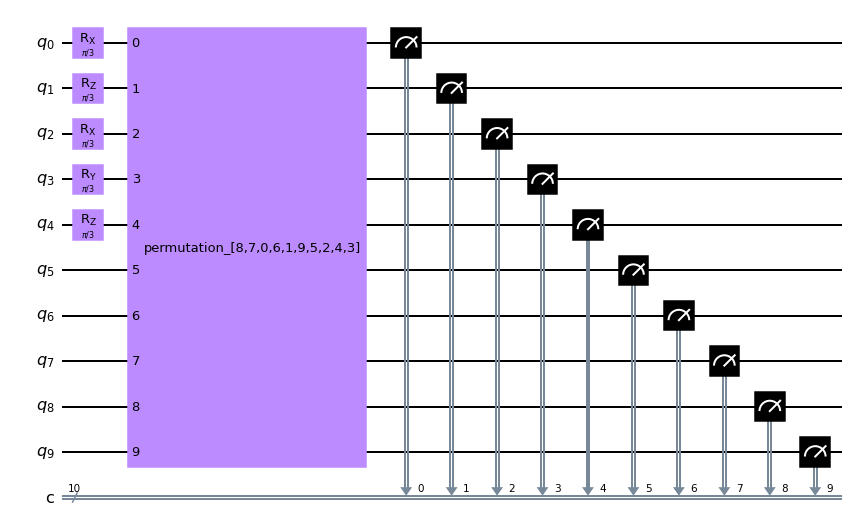

In [18]:
warnings.filterwarnings('ignore')
########### PERMUTATION WITH PATTERN 8,7,0,6,1,9,5,2,4,3 

circuit = QuantumCircuit(q, c)

circuit.rx(pi/3,q[0])
circuit.rz(pi/3,q[1])
circuit.rx(pi/3,q[2])
circuit.ry(pi/3,q[3])
circuit.rz(pi/3,q[4])

circuit += Permutation(num_qubits = 10, pattern = [8,7,0,6,1,9,5,2,4,3])

circuit.measure(q, c)

job = execute(circuit, backend, shots=100)
job_monitor(job)

counts = job.result().get_counts()

# Visualización del circuito
print(counts)
circuit.draw(output='mpl', style={'backgroundcolor': '#FFFFFF'})

### Configuración de Luis

$S,R_x(\frac{\pi}{3}), R_y(\frac{\pi}{4}))$

Job Status: job has successfully run
{'0000000000': 38, '0000010000': 14, '1000000000': 13, '1000010000': 3, '1010000000': 2, '1010010000': 3, '0010000000': 20, '0010010000': 7}


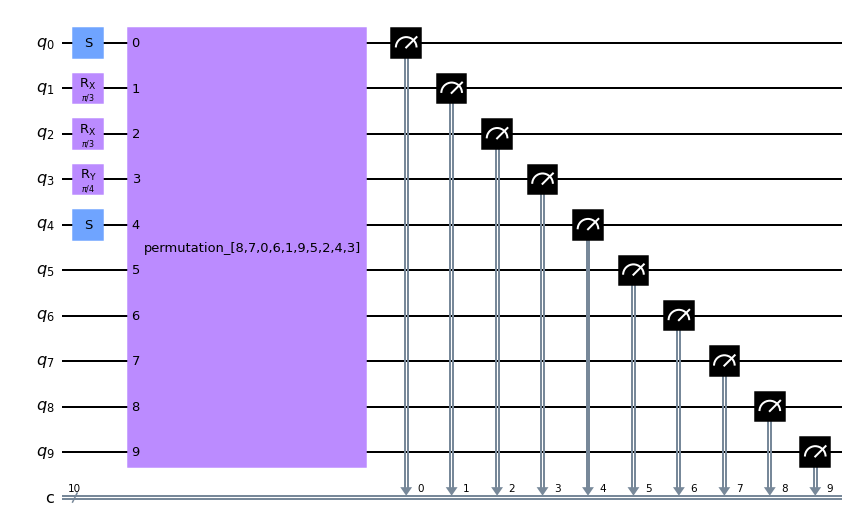

In [20]:
warnings.filterwarnings('ignore')

circuit = QuantumCircuit(q, c)

circuit.s(q[0])
circuit.rx(pi/3,q[1])
circuit.rx(pi/3,q[2])
circuit.ry(pi/4,q[3])
circuit.s(q[4])

circuit += Permutation(num_qubits = 10, pattern = [8,7,0,6,1,9,5,2,4,3])

circuit.measure(q, c)

job = execute(circuit, backend, shots=100)
job_monitor(job)

counts = job.result().get_counts()

# Visualización del circuito
print(counts)
circuit.draw(output='mpl', style={'backgroundcolor': '#FFFFFF'})

## 4. <u>Generación real de números cuánticos mediante permutación</u>

4.1. Teniendo en cuenta los circuitos cuánticos estudiados en las dos secciones anteriores (<b>sección 1</b> y <b>sección 2</b> de esta guía), realice un programa en <b>Qiskit</b> que genere números aleatorios, de manera que dicha generación esté basada en la <u>permutación cuántica aleatoria</u> de <b>7 qubits</b>. Para ello: 

&nbsp;&nbsp;&nbsp;a. Inicialice <b>4 qubits</b> utilizando las tres compuertas cuánticas asignadas en la <b>Tabla 1</b>.

Job Status: job has successfully run
{'0000000': 42, '0010000': 15, '0010010': 5, '0011000': 4, '0011010': 1, '0000010': 13, '0001000': 15, '0001010': 5}


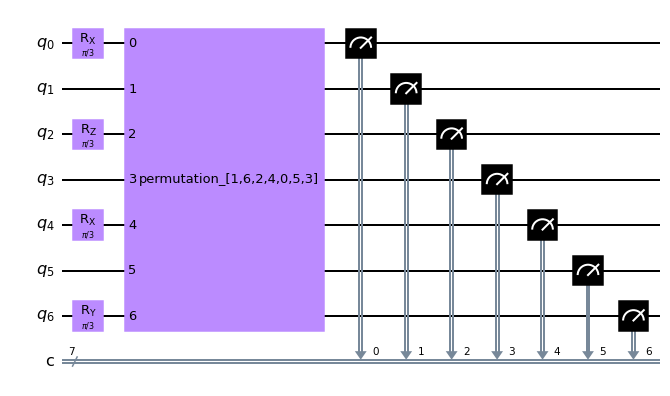

In [25]:
q = QuantumRegister(7, 'q')
c = ClassicalRegister(7, 'c')

circuit = QuantumCircuit(q, c)

circuit.rx(pi/3,q[0])
circuit.rz(pi/3,q[2])
circuit.rx(pi/3,q[4])
circuit.ry(pi/3,q[6])
circuit += Permutation(num_qubits = 7)

circuit.measure(q, c)

job = execute(circuit, backend, shots=100)
job_monitor(job)

counts = job.result().get_counts()

# Visualización del circuito
print(counts)
circuit.draw(output='mpl', style={'backgroundcolor': '#FFFFFF'})

&nbsp;&nbsp;&nbsp;b. Ejecute su circuito cuántico en un <u>procesador cuántico de 7 qubits</u> de IBM. Para ello, utilice el <i>provider</i> de <i>backends</i> suministrado para la <b>Universidad de Antioquia</b>, y seleccionando el <i>backend</i> que se encuentre menos ocupado al momento de ejecutar su circuito. Observe a continuación el código requerido: 

In [29]:
from qiskit.providers.ibmq import least_busy
my_provider = IBMQ.get_provider(hub = 'ibm-q-education', group = 'uni-antioquia-1', project = 'qcudea2022-1')

remote_backend = least_busy(my_provider.backends(filters = lambda x: x.configuration().n_qubits >= 7
                                                and not x.configuration().simulator
                                                and x.status().operational == True))

print("El computador cuántico de 7 cubits menos ocupado es el",remote_backend.name())

El computador cuántico de 7 cubits menos ocupado es el ibm_oslo


Job Status: job has successfully run
{'0000000': 32, '0000001': 12, '0010000': 15, '0010001': 5, '0000010': 1, '0100000': 6, '0100001': 7, '0000011': 1, '0110000': 8, '0110001': 2, '0110101': 1, '0000100': 2, '1000000': 2, '0000101': 1, '1010000': 1, '1100000': 1, '1100010': 1, '1100100': 1, '0001011': 1}


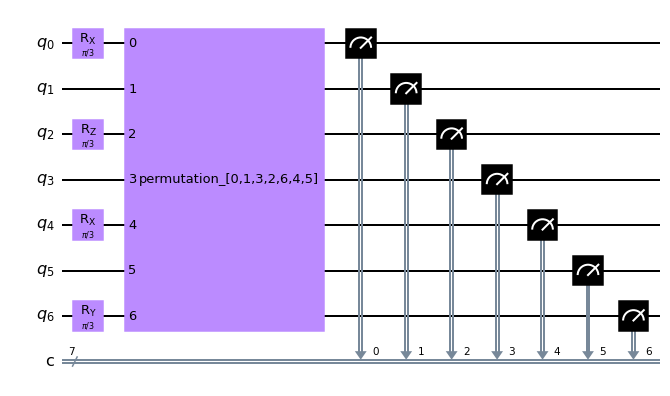

In [30]:
backend = provider.get_backend('ibm_oslo')

q = QuantumRegister(7, 'q')
c = ClassicalRegister(7, 'c')

circuit = QuantumCircuit(q, c)

circuit.rx(pi/3,q[0])
circuit.rz(pi/3,q[2])
circuit.rx(pi/3,q[4])
circuit.ry(pi/3,q[6])
circuit += Permutation(num_qubits = 7)

circuit.measure(q, c)

job = execute(circuit, backend, shots=100)
job_monitor(job)

counts = job.result().get_counts()

# Visualización del circuito
print(counts)
circuit.draw(output='mpl', style={'backgroundcolor': '#FFFFFF'})

#### A continuación se muestra el histograma de frecuencias que resulta en la página de IBM

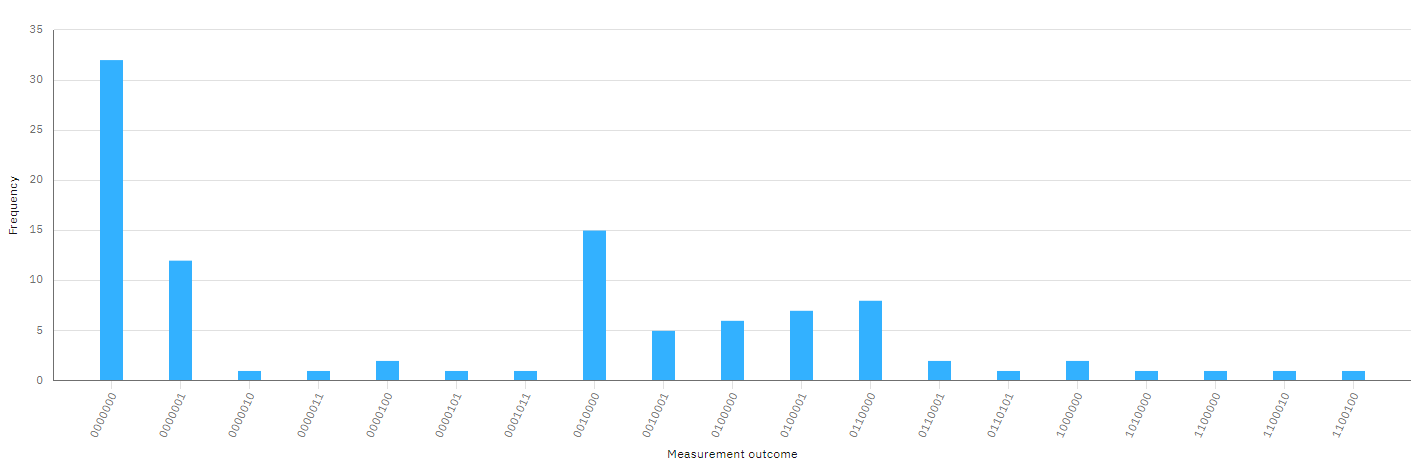

El histograma coincide con el conteo que se muestra en este mismo <k>Notebook</k>

4.2. Explique matemáticamente la permutación realizada en su circuito, el número aleatorio generado y más resultados adicionales encontrados en su circuito.

* Para este caso la permutación es:
> $P_{7} = 7! = 5040$ por lo que serán estos los posibles valores que se van a obtener al ejecutar el código, sin embargo, no todos los valores son equiprobables, debido a que algunos cubits han sido alterados añadiendo compuertas antes de realizar la permutación. 

4.3. Anexe a su informe de esta práctica su código fuente resultante. 
> El código ha sido añadido en las celdas anteriores.

## Conclusiones

* Si no se agregan compuertas todos los valores resultantes aleatorios serán equiprobables, por lo que estas compuertas se pueden agregar para agregar pseudoaleatoriedad.

* En la simulación y la ejecución en un computador cuántico real se observó que el resultado con más apariciones es el cero, esto puede deberse a la inicialización automática de IBM, si esta incialización fuera $\ket{1}$ los resultados observados variarían de forma considerable.


## Referencias

* <a href="https://www.quantum-inspire.com/kbase/rotation-operators/">https://www.quantum-inspire.com/kbase/rotation-operators/</a><br> 

* <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.library.Permutation.html">https://qiskit.org/documentation/stubs/qiskit.circuit.library.Permutation.html</a><br> 

* <a href="https://www.phys.hawaii.edu/~yepez/Spring2013/lectures/Lecture1_Qubits_Notes.pdf">https://www.phys.hawaii.edu/~yepez/Spring2013/lectures/Lecture1_Qubits_Notes.pdf</a><br> 



In [32]:
# import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright